In [3]:
# import thu vien
from pandas_datareader import data as wb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.insert(0,'/Users/binh230901/Desktop/DA/project/finance/portfolio_optimization/')
from GetStock import stock_price
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# get stock price
df = stock_price(['AAPL', 'MSFT', 'NFLX'])
df.reset_index(inplace= True)
df

,Date,AAPL,MSFT,NFLX
0,2020-12-31,132.690002,222.419998,540.729980
1,2021-01-04,129.410004,217.690002,522.859985
2,2021-01-05,131.009995,217.899994,520.799988
3,2021-01-06,126.599998,212.250000,500.489990
4,2021-01-07,130.919998,218.289993,508.890015
...,...,...,...,...
432,2022-09-20,156.899994,242.449997,242.850006
433,2022-09-21,153.720001,238.949997,236.869995
434,2022-09-22,152.740005,240.979996,237.050003
435,2022-09-23,150.429993,237.919998,226.410004


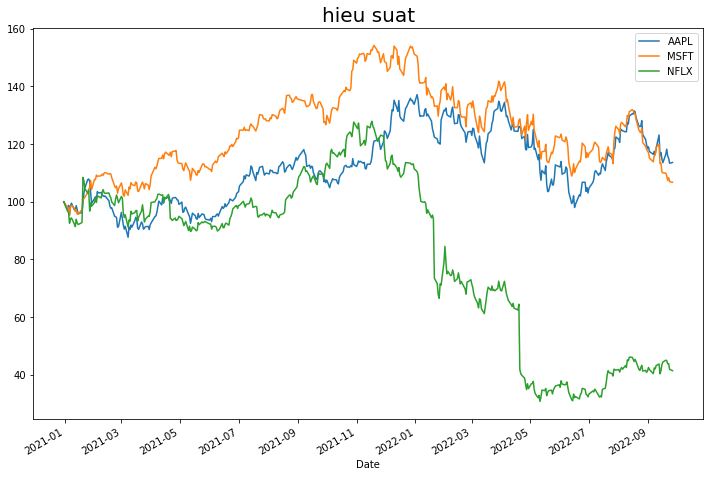

In [5]:
# price_chart (normalize to start at the same price)
df1 = df.iloc[:,1:]/df.iloc[0,1:] * 100
df1['Date'] = df['Date']
df1.plot(x= 'Date',  y= ['AAPL', 'MSFT', 'NFLX'],
         figsize = (12, 8)
        );
plt.title('hieu suat',
         fontdict={'fontsize': 20});

In [6]:
# log return
log_ret = np.log(df.iloc[:,1:]/df.iloc[:,1:].shift(1))
log_ret

,AAPL,MSFT,NFLX
0,NaN,NaN,NaN
1,-0.025030,-0.021495,-0.033606
2,0.012288,0.000964,-0.003948
3,-0.034241,-0.026271,-0.039778
4,0.033554,0.028060,0.016644
...,...,...,...
432,0.015544,-0.008502,-0.003207
433,-0.020476,-0.014541,-0.024933
434,-0.006396,0.008460,0.000760
435,-0.015239,-0.012779,-0.045924


In [7]:
# annualized log return
log_ret.mean() *252

AAPL    0.073831
MSFT    0.037794
NFLX   -0.509180
dtype: float64

In [8]:
# correlation
log_ret.corr()

,AAPL,MSFT,NFLX
AAPL,1.000000,0.766844,0.428402
MSFT,0.766844,1.000000,0.456486
NFLX,0.428402,0.456486,1.000000


## weight

In [9]:
num_stock = len(df.iloc[0,1:])


In [10]:
# create a weight portfolio random
weight = np.random.random(num_stock)
weight = weight*100/np.sum(weight)
weight
np.sum(weight* log_ret.mean()*252)

-35.62153786518528

## portfolio return

In [11]:
#calculate return 
np.sum(weight* log_ret.mean()*252)

-35.62153786518528

## port standard deviation

In [12]:
port_std= np.sqrt(np.dot(weight.transpose(), np.dot(weight, log_ret.cov()*252)))
port_std

45.055154167850574

## run 1000 simulation with different weight

In [13]:
port_ret = []
port_vol = []
port_weight= []
for i in range(1000):
    weight = np.random.random(num_stock)
    weight = weight*100/np.sum(weight)
    port_ret.append(np.sum(weight* log_ret.mean()*252))
    port_vol.append(np.sqrt(np.dot(weight.transpose(), np.dot(weight, log_ret.cov()*252))))
    port_weight.append(weight)
port_ret = np.array(port_ret)
port_vol = np.array(port_vol)
port_ret
port_vol
port_weight

[array([39.24805247, 29.0278561 , 31.72409144]),
 array([31.89091409, 36.95649382, 31.15259209]),
 array([37.64716846, 11.22403279, 51.12879875]),
 array([68.98014867, 19.1143916 , 11.90545973]),
 array([31.69689097, 36.44802416, 31.85508487]),
 array([60.8123737 , 31.70797673,  7.47964957]),
 array([54.48640153, 28.23858263, 17.27501585]),
 array([24.12013161, 48.20242139, 27.677447  ]),
 array([54.34016339, 10.06666514, 35.59317147]),
 array([25.70420538, 62.01631788, 12.27947674]),
 array([17.37612173, 63.55371347, 19.07016481]),
 array([51.64547894, 12.89954918, 35.45497189]),
 array([34.25261318, 60.98219995,  4.76518687]),
 array([ 2.33469793, 40.42873324, 57.23656883]),
 array([34.13067276, 18.54400995, 47.3253173 ]),
 array([38.69322894, 21.20108134, 40.10568971]),
 array([7.85269296e+01, 2.14127330e+01, 6.03374080e-02]),
 array([38.52225786, 44.92906882, 16.54867331]),
 array([ 8.44029742, 75.23518219, 16.32452039]),
 array([37.36985243,  8.5052369 , 54.12491067]),
 array([61.

## plot efficient frontier

In [14]:
# create a portfolio with 2 column: return and volatilities
port = pd.DataFrame({
    'return': port_ret,
    'vol': port_vol,
    'weight': port_weight
})
port

,return,vol,weight
0,-12.158446,31.063153,"[39.24805246591107, 29.02785609542074, 31.7240..."
1,-12.110982,30.805960,"[31.890914092924067, 36.95649381947954, 31.152..."
2,-22.829999,37.210427,"[37.647168460652004, 11.224032788925605, 51.12..."
3,-0.246712,28.019512,"[68.9801486686189, 19.114391599322722, 11.9054..."
4,-12.502219,30.991132,"[31.696890969516925, 36.448024164307355, 31.85..."
...,...,...,...
995,-14.343160,31.867297,"[29.59572647490371, 35.32193895598576, 35.0823..."
996,-1.992773,27.557683,"[50.250269678050465, 35.886065960233466, 13.86..."
997,-13.924102,31.388769,"[14.241470925320225, 52.45394906775288, 33.304..."
998,-32.609674,42.906771,"[3.84318009972852, 29.375585472929664, 66.7812..."


In [15]:
port['AAPL_wei'] = port['weight'].apply(lambda x: round(x[0],2))
port['MSFT_wei'] = port['weight'].apply(lambda x: round(x[1],2))
port['NFLX_wei'] = port['weight'].apply(lambda x: round(x[2],2))
port.drop('weight', axis= 1, inplace= True)
port

,return,vol,AAPL_wei,MSFT_wei,NFLX_wei
0,-12.158446,31.063153,39.25,29.03,31.72
1,-12.110982,30.805960,31.89,36.96,31.15
2,-22.829999,37.210427,37.65,11.22,51.13
3,-0.246712,28.019512,68.98,19.11,11.91
4,-12.502219,30.991132,31.70,36.45,31.86
...,...,...,...,...,...
995,-14.343160,31.867297,29.60,35.32,35.08
996,-1.992773,27.557683,50.25,35.89,13.86
997,-13.924102,31.388769,14.24,52.45,33.30
998,-32.609674,42.906771,3.84,29.38,66.78


Text(0, 0.5, 'return')

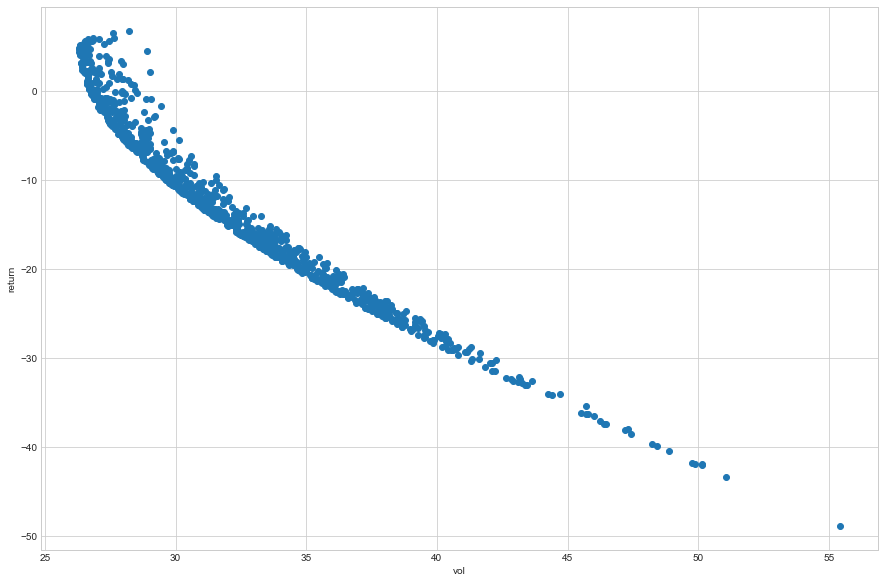

In [16]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,10))
plt.scatter(y= port['return'], x= port['vol'])
plt.xlabel('vol')
plt.ylabel('return')


## caculate port_weigt for max return

In [17]:
port.loc[port['return'] == port['return'].max()]

,return,vol,AAPL_wei,MSFT_wei,NFLX_wei
24,6.705325,28.201888,87.86,11.7,0.44


## caculate port_weight for min volatilities

In [18]:
port.loc[port['vol'] == port['vol'].min()]

,return,vol,AAPL_wei,MSFT_wei,NFLX_wei
681,4.755424,26.295799,35.02,64.46,0.52


In [19]:
port

,return,vol,AAPL_wei,MSFT_wei,NFLX_wei
0,-12.158446,31.063153,39.25,29.03,31.72
1,-12.110982,30.805960,31.89,36.96,31.15
2,-22.829999,37.210427,37.65,11.22,51.13
3,-0.246712,28.019512,68.98,19.11,11.91
4,-12.502219,30.991132,31.70,36.45,31.86
...,...,...,...,...,...
995,-14.343160,31.867297,29.60,35.32,35.08
996,-1.992773,27.557683,50.25,35.89,13.86
997,-13.924102,31.388769,14.24,52.45,33.30
998,-32.609674,42.906771,3.84,29.38,66.78
